<a href="https://colab.research.google.com/github/lguilleng/google_colab/blob/main/validacion_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algo de validación cruzada de un modelo**
#Autor: Luis Guillen Grados

La validación cruzada o cross validation es una técnica utilizada para evaluar los resultados de un análisis estadístico cuando el conjunto de datos se ha segmentado enuna muestra de entrenamiento y otra de prueba, la validación cruzada comprueba si los resultados del análisis son independientes de la partición.


Suponiedo que necesitamos **PREDECIR** el redimiento académico promedio por escuela, en función del tamaño promedio de las aulas, el porcentaje de comidas gratis que se enregan y, el procentaje de profesores con credenciales completas para la enseñanza. El modelo sería:

$rendimiento=\beta _{0}+\beta _{1}tamano+\beta _{2}comidas+\beta _{3}credenciales$

## **Validación Simple**
![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*GLnW_te0TRnUACR7.png)



**Leer de datos y preparar conjunto de entrenamiento y prueba**

In [ ]:
# lectura de datos
datos <- read.table("/content/data_3.csv", header=TRUE, sep=",", na.strings="NA", dec=".", strip.white=TRUE)
#datos

# dividimos en 2 conjuntos de datos (entrenamiento y prueba)
install.packages("caTools")
library(caTools)
set.seed(1)
conjunto <- sample.split(datos$rendimiento,SplitRatio=0.8)
entrenamiento <- subset(datos, conjunto=="TRUE")
prueba <- subset(datos,conjunto=="FALSE")
#nrow(entrenamiento)
#nrow(prueba)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Estimación del moldelo con el conjunto total de observaciones**

In [ ]:
modelo_total <- lm(rendimiento~comidas+tamaño_k3+credenciales, data = datos)
summary(modelo_total)


Call:
lm(formula = rendimiento ~ comidas + tamaño_k3 + credenciales, 
    data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-170.494  -41.422   -1.817   43.355  168.764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  771.6581    48.8607  15.793  < 2e-16 ***
comidas       -3.6863     0.1118 -32.978  < 2e-16 ***
tamaño_k3     -0.7171     2.2388  -0.320    0.749    
credenciales   1.3271     0.2389   5.556  5.1e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59.81 on 394 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8228 
F-statistic: 615.5 on 3 and 394 DF,  p-value: < 2.2e-16


**Estimar modelo en el conjunto de entrenamiento**

In [ ]:
# Estimar el modelo en el conjunto de entrenamiento
modelo <- lm(rendimiento~comidas+tamaño_k3+credenciales, data = entrenamiento)
summary(modelo)


Call:
lm(formula = rendimiento ~ comidas + tamaño_k3 + credenciales, 
    data = entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-168.623  -41.441   -2.641   43.816  166.790 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  765.6175    54.5451  14.036   <2e-16 ***
comidas       -3.6469     0.1244 -29.307   <2e-16 ***
tamaño_k3     -0.6128     2.4867  -0.246    0.806    
credenciales   1.3120     0.2629   4.989    1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60.11 on 314 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8212,	Adjusted R-squared:  0.8195 
F-statistic: 480.7 on 3 and 314 DF,  p-value: < 2.2e-16


**Calcular indicadores en conjunto de entrenamiento y prueba**

**- Coeficiente de determinación (R2)**

¿Qué tan bien se ajusta el modelo a las observaciones reales que tenemos?

$R^{2}=1-\frac{\sum_{n=1}^{n}{(y_{i}-\widehat{y_{i}})^{2}}}{\sum_{n=1}^{n}{(y_{i}-\overline{y})^{2}}}$

**- Error Absoluto Medio (MAE)**

¿Qué tan diferente es el valor predicho y el valor observado?

$MAE=\frac{\sum_{i=1}^{n}|y_{i}-\widehat{y_{i}}|}{n}$

**- Raíz del Error Cuadrático Medio (RMSE)**

¿Qué tan cerca es la línea de ajuste de nuestra regresión a las observaciones?

$RMSE=\sqrt{\frac{\sum_{n=1}^{n}{(y_{i}-\widehat{y_{i}})^{2}}}{n}}$



In [ ]:
# Calculamos R2, MAE y RMSE en el conjunto total de observaciones
p_total <- predict(object = modelo_total, newdata = datos)
#p_total
e_total <- datos$rendimiento - p_total
mae_total <- mean(abs(na.omit(e_total)))
rmse_total <- sqrt(mean(na.omit(e_total^2)))
r2_total <- 1-rmse_total^2/var(datos$rendimiento)

# Calculamos R2, MAE y RMSE en el conjunto de entrenamiento
p_entrenamiento <- predict(object = modelo, newdata = entrenamiento)
#p_entrenamiento
e_entrenamiento <- entrenamiento$rendimiento - p_entrenamiento
mae_entrenamiento <- mean(abs(na.omit(e_entrenamiento)))
rmse_entrenamiento <- sqrt(mean(na.omit(e_entrenamiento^2)))
r2_entrenamiento <- 1-rmse_entrenamiento^2/var(entrenamiento$rendimiento)

# Calculamos R2, MAE y RMSE en el conjunto de prueba
p_prueba <- predict(object = modelo, newdata = prueba)
#p_prueba
e_prueba <- prueba$rendimiento - p_prueba
mae_prueba <- mean(abs(na.omit(e_prueba)))
rmse_prueba <-sqrt(mean(na.omit(e_prueba^2)))
r2_prueba <- 1-rmse_prueba^2/var(prueba$rendimiento)

data.frame(
    Conjunto=c("Total","Entrenamiento","Prueba"), R2=c(r2_total,r2_entrenamiento,r2_prueba),MAE=c(mae_total,mae_entrenamiento,mae_prueba),RMSE=c(rmse_total,rmse_entrenamiento,rmse_prueba)
)

Conjunto,R2,MAE,RMSE
<chr>,<dbl>,<dbl>,<dbl>
Total,0.8250137,47.53620,59.50468
Entrenamiento,0.8222441,48.09988,59.72607
Prueba,0.8329377,45.38931,59.06605


**Y si eleccionamos otros conjuntos de entrenamiento y prueba ¿como varían, por ejemplo el RMSE?**

Replicamos la validación simple 100 veces y observamos le variabilidad del RMSE en los conjuntos de entrenamiento

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


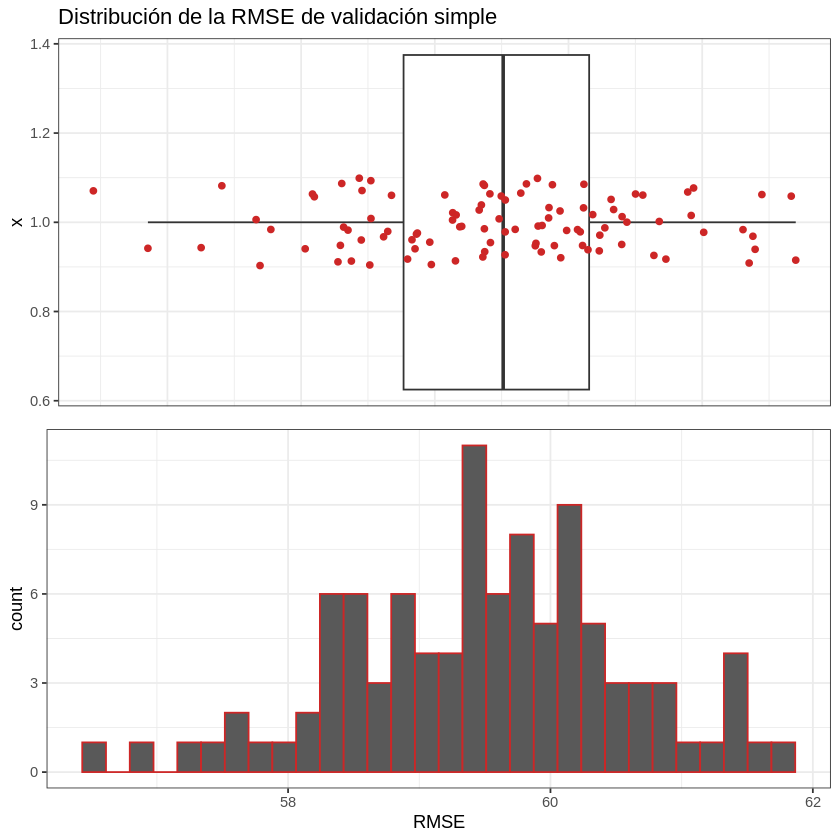

In [ ]:
install.packages("ggplot2")
install.packages("gridExtra")
library(ggplot2)
library(gridExtra)

RMSE <- rep(NA,100)
set.seed(Sys.time())
for (i in 1:100) {
  conjunto <- sample.split(datos$rendimiento,SplitRatio=0.8)
  entrenamiento <- subset(datos, conjunto=="TRUE")
  modelo <- lm(rendimiento~comidas+tamaño_k3+credenciales, data = entrenamiento)
  p_entrenamiento <- predict(object = modelo, newdata = entrenamiento)
  RMSE[i] <- sqrt(mean(na.omit(entrenamiento$rendimiento- p_entrenamiento)^2))
}

p1 <- ggplot(data = data.frame(RMSE = RMSE), aes(x = 1, y = RMSE)) +
      geom_boxplot(outlier.shape = NA) +
      geom_jitter(colour = c("firebrick3"), width = 0.1) +
      coord_flip() +
      labs(title = "Distribución de la RMSE de validación simple") +
      theme_bw() +
      theme(axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank())

p2 <- ggplot(data = data.frame(RMSE = RMSE), aes(RMSE)) +
      geom_histogram(colour = "firebrick3") +
      theme_bw()

grid.arrange(p1, p2, ncol = 1)

## **Validación cruzada K Fold**

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


In [ ]:
install.packages("caret")
library(caret)

In [ ]:
# Especificamos el método de validación cruzada K-Fold
kf <- trainControl(method = "cv", number = 5)

# Estimamos el modelo de regresión y usamos k-fold CV para evaluar desempeño
modelo <- train(rendimiento~comidas+tamaño_k3+credenciales, data = na.omit(datos), method = "lm", trControl = kf)

# Resumen de la validación por K-Fold
print(modelo)

Linear Regression 

398 samples
  3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 318, 318, 318, 319, 319 
Resampling results:

  RMSE    Rsquared   MAE     
  60.574  0.8211128  48.38422

Tuning parameter 'intercept' was held constant at a value of TRUE
